<a href="https://colab.research.google.com/github/SnehaPandey-1720/Ds-Da-learning-hub/blob/main/Cluster_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis

- Objective: The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

![image.png](attachment:c771360d-695a-4aca-bec3-68cbf5bf3eb6.png)

## Importing libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name=1)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.shape

(3999, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Data Preprocessing

In [ ]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
df = df.fillna(df.median())

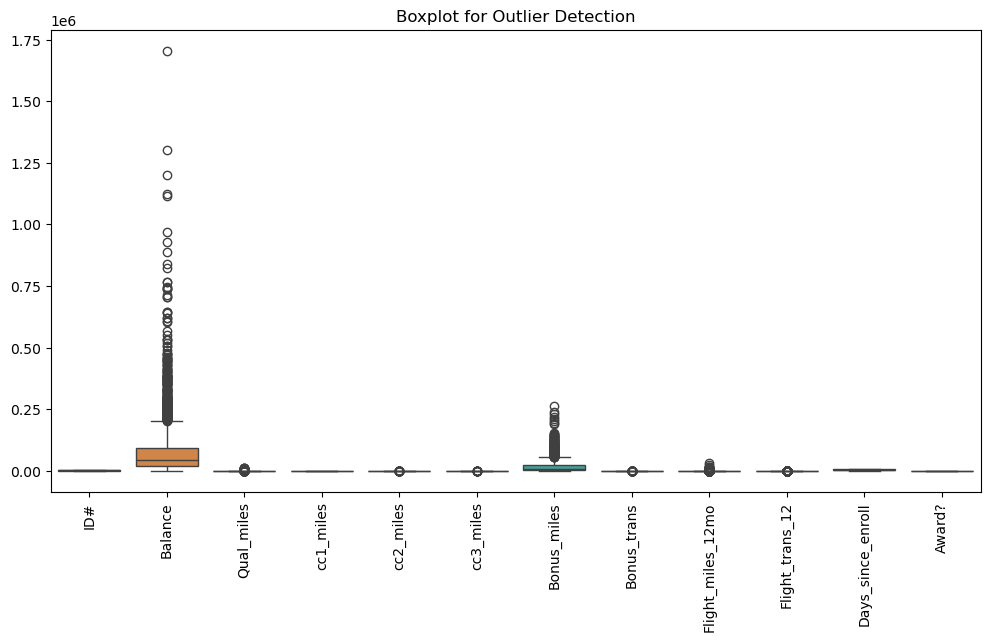

In [ ]:
# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

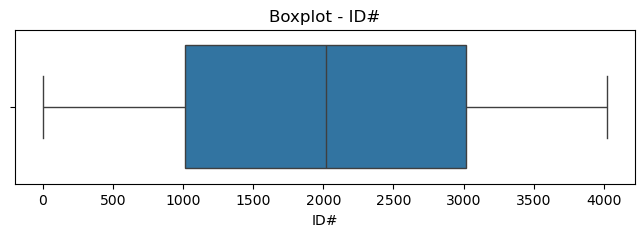

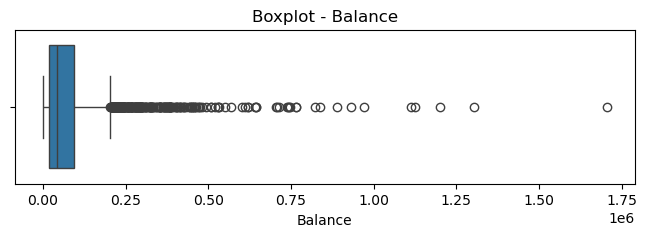

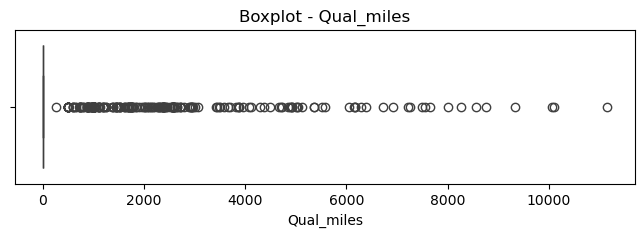

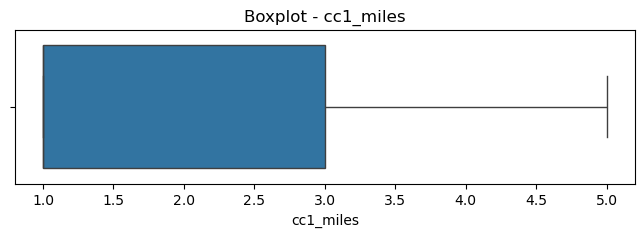

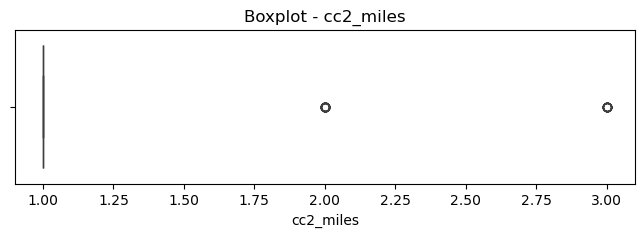

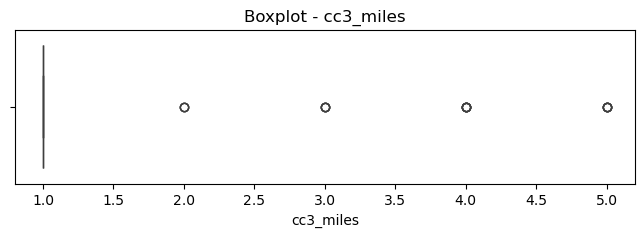

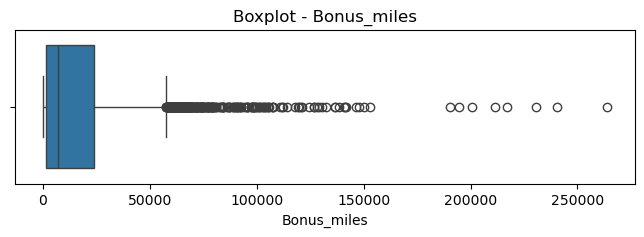

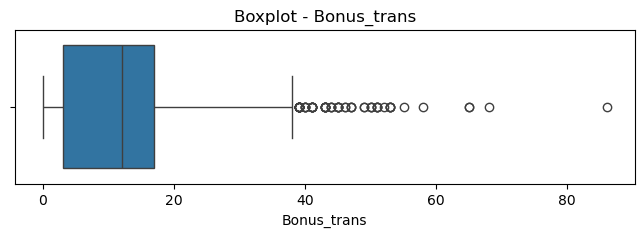

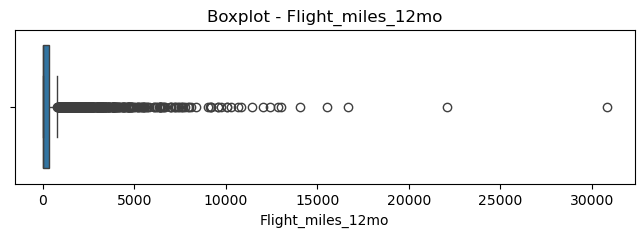

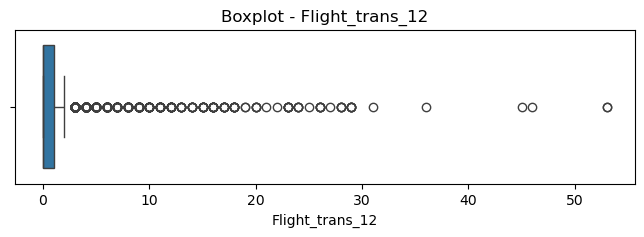

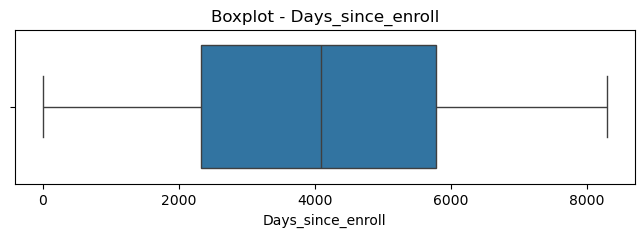

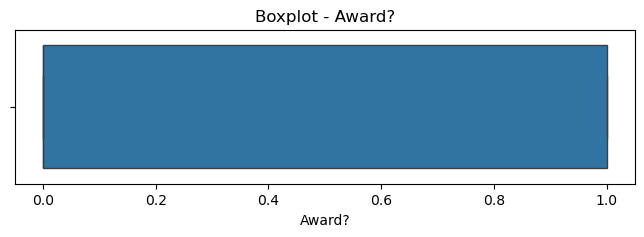

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

In [ ]:
from scipy import stats
# Z-score method to flag extreme outliers (|z| > 3)
z_scores = np.abs(stats.zscore(df[num_cols], nan_policy='omit'))
outlier_mask = (z_scores > 3)
# Count outliers per column:
outlier_counts = pd.DataFrame(outlier_mask, columns=num_cols).sum().sort_values(ascending=False)
display(outlier_counts)

Flight_trans_12      91
Qual_miles           83
Flight_miles_12mo    78
Balance              75
Bonus_miles          72
Bonus_trans          47
cc2_miles            43
cc3_miles            18
ID#                   0
cc1_miles             0
Days_since_enroll     0
Award?                0
dtype: int64

In [ ]:
outlier_percentage = (outlier_mask.sum() / len(df)).sort_values(ascending=False)

outlier_percentage

Flight_trans_12      0.022756
Qual_miles           0.020755
Flight_miles_12mo    0.019505
Balance              0.018755
Bonus_miles          0.018005
Bonus_trans          0.011753
cc2_miles            0.010753
cc3_miles            0.004501
ID#                  0.000000
cc1_miles            0.000000
Days_since_enroll    0.000000
Award?               0.000000
dtype: float64

In [ ]:
# Handling outliers by capping (winsorization) at 1st and 99th percentiles
def winsorize_series(s, lower_pct=0.01, upper_pct=0.99):
    lower = s.quantile(lower_pct)
    upper = s.quantile(upper_pct)
    return s.clip(lower, upper)

for col in num_cols:
    df[col] = winsorize_series(df[col], 0.01, 0.99)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

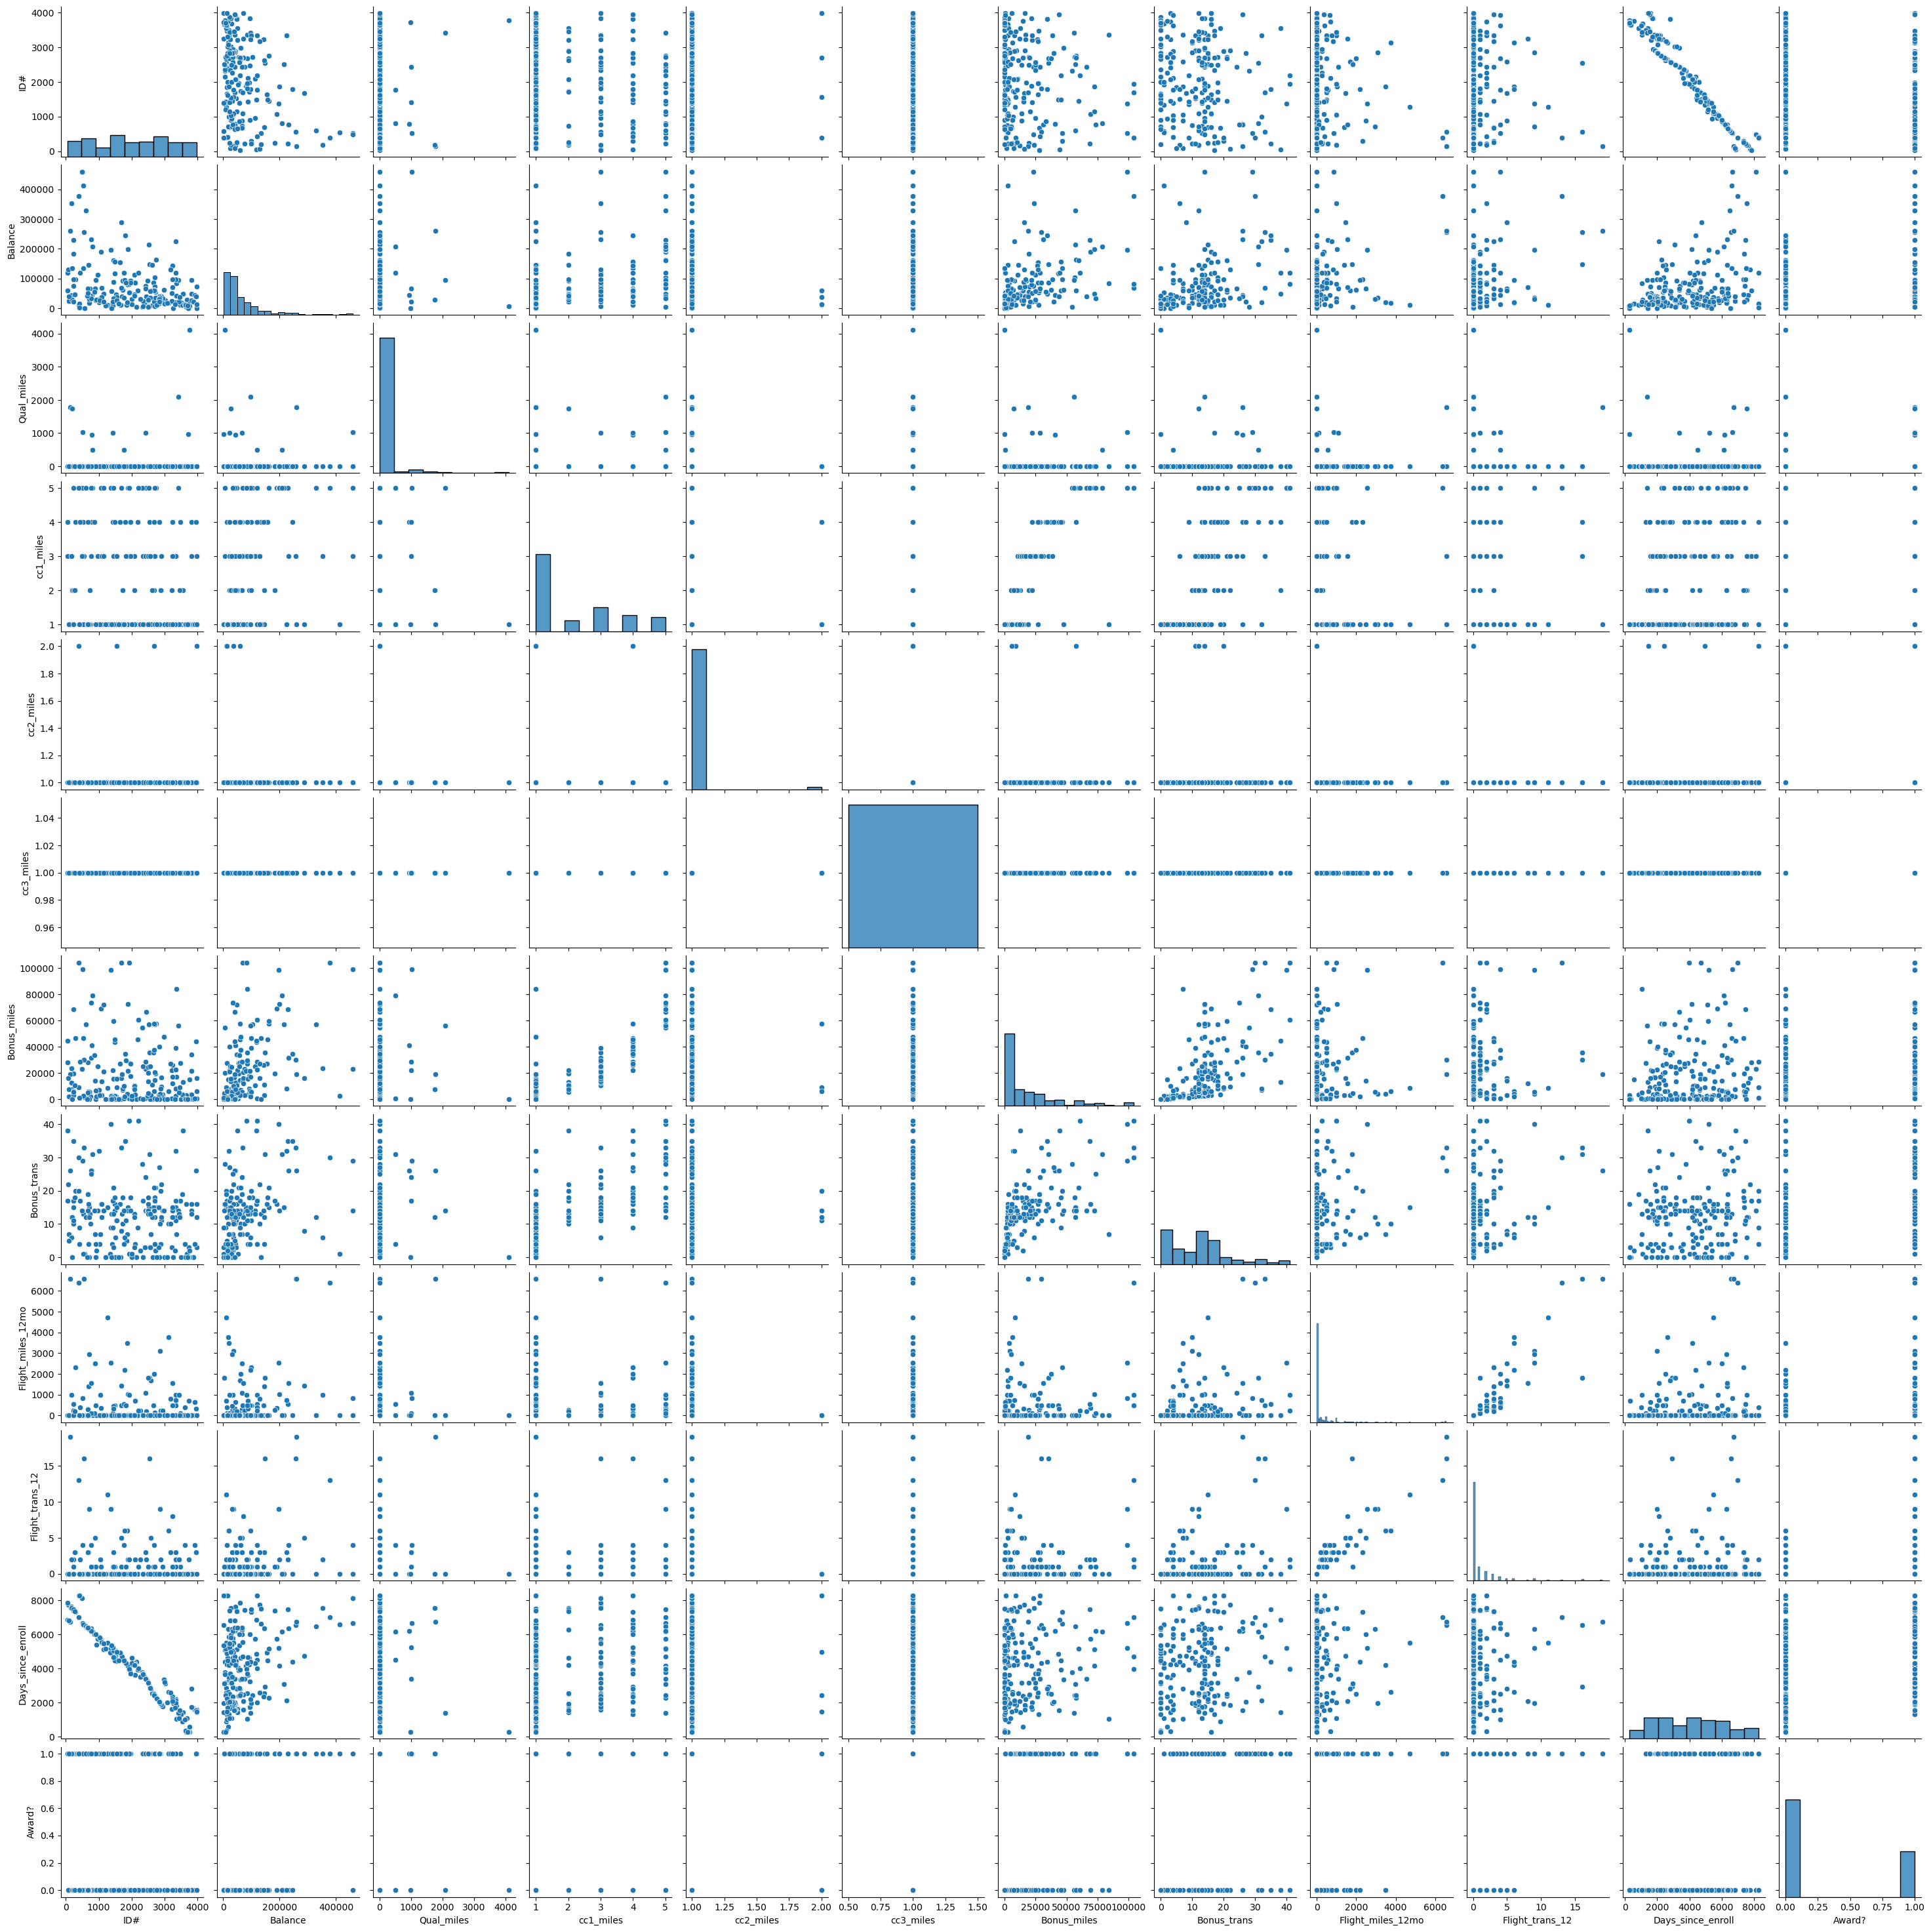

In [ ]:
# Exploratory Data Visualization
sns.pairplot(df.sample(200))
plt.show()

## Implementing Clustering Algorithms

### K-Means Clustering

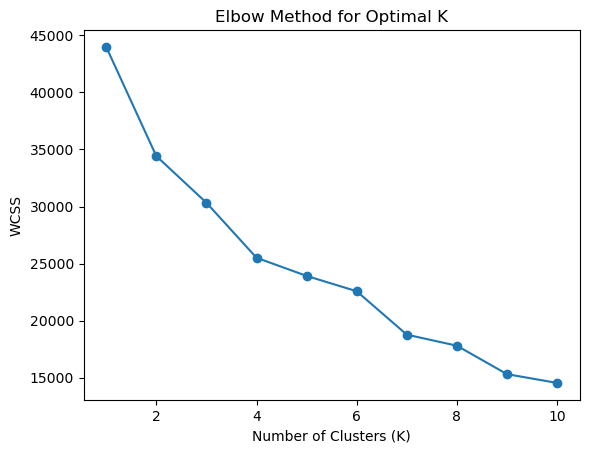

In [ ]:
#1. Elbow Method to Find Optimal K
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
#2. Apply K-Means with Optimal K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [ ]:
#3. K-Means Evaluation (Silhouette Score)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_silhouette

0.20486782541630236

### DBSCAN Clustering

In [ ]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [ ]:
# DBSCAN Evaluation

# Remove noise points (-1)
mask = dbscan_labels != -1

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(
        scaled_data[mask],
        dbscan_labels[mask]
    )
    dbscan_silhouette

In [ ]:
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
dbscan_silhouette

0.014951612359479064

## Visualization of Clusters

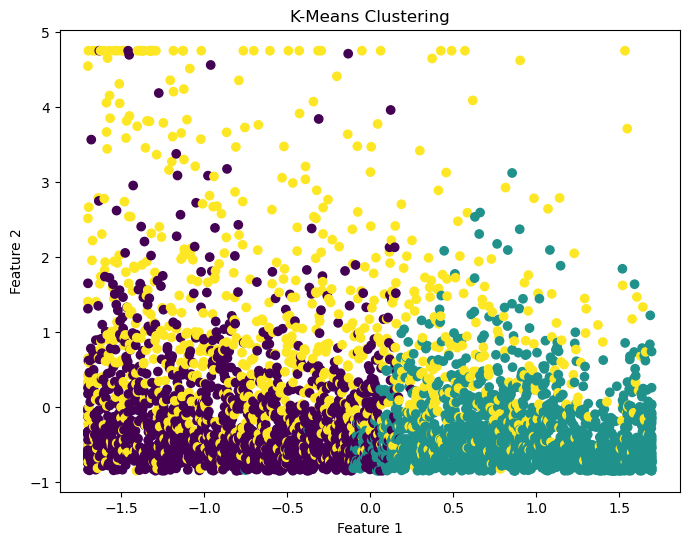

In [ ]:
# Visualizing K-Means Clusters
plt.figure(figsize=(8,6))
plt.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    c=kmeans_labels,
    cmap='viridis'
)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

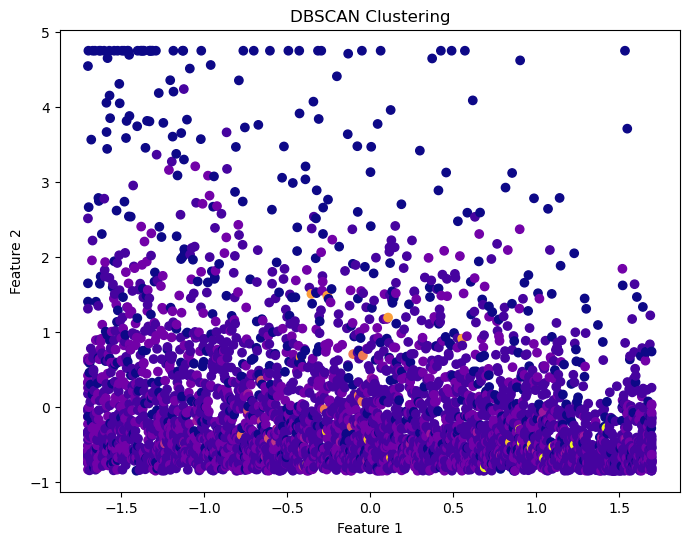

In [ ]:
# Visualizing DBSCAN Clusters
plt.figure(figsize=(8,6))
plt.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    c=dbscan_labels,
    cmap='plasma'
)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Cluster Analysis and Interpretation

**Insights from K-Means**

- Forms clearly defined clusters
- Requires pre-specification of number of clusters
- Sensitive to outliers

**Insights from DBSCAN**

- Automatically detects number of clusters
- Identifies noise points
- Performs well on irregular-shaped clusters

In [ ]:
# Comparison of Both two tables

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

kmeans_clusters = len(np.unique(kmeans_labels))
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

dbscan_noise_points = np.sum(dbscan_labels == -1)

kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)

# Remove noise points for DBSCAN silhouette score
mask = dbscan_labels != -1

dbscan_silhouette = silhouette_score(
    scaled_data[mask],
    dbscan_labels[mask]
)

comparison_df = pd.DataFrame({
    "Algorithm": ["K-Means", "DBSCAN"],
    "Number of Clusters": [kmeans_clusters, dbscan_clusters],
    "Silhouette Score": [kmeans_silhouette, dbscan_silhouette],
    "Noise Points Detected": ["No", dbscan_noise_points]
})

print (comparison_df)
if kmeans_silhouette > dbscan_silhouette:
    print("K-Means provides better cluster separation based on Silhouette Score.")
else:
    print("DBSCAN provides better cluster separation based on Silhouette Score.")

  Algorithm  Number of Clusters  Silhouette Score Noise Points Detected
0   K-Means                   3          0.204868                    No
1    DBSCAN                   9          0.080152                   542
K-Means provides better cluster separation based on Silhouette Score.


### Interpretation of Clustering Results Based on Silhouette Score

#### Clustering Evaluation Summary

| Algorithm | Number of Clusters | Silhouette Score | Noise Points Detected |
|----------|-------------------|------------------|-----------------------|
| K-Means  | 3                 | 0.204868         | No                    |
| DBSCAN  | 9                 | 0.080152         | 542                   |

---

### Is the Silhouette Score Low?

Yes, **both Silhouette Scores are low**.

- A Silhouette Score close to **1** indicates well-separated clusters
- A score close to **0** indicates overlapping clusters
- A **negative value** indicates incorrect clustering

#### Interpretation:
- **K-Means (0.2049)** → Weak to moderate cluster separation  
- **DBSCAN (0.0802)** → Very weak cluster separation

---

### Reasons for Low Silhouette Score in K-Means

1. **Overlapping Clusters**
   - Customer features in the dataset are not clearly separable
   - Many data points lie close to cluster boundaries

2. **Assumption of Spherical Clusters**
   - K-Means assumes clusters are convex and spherical
   - Real-world customer data often has complex shapes

3. **High-Dimensional Data**
   - Distance-based algorithms struggle in high-dimensional space
   - Euclidean distances become less meaningful

4. **Presence of Outliers**
   - K-Means does not handle outliers
   - Outliers pull centroids away from dense regions

5. **Fixed Number of Clusters**
   - Predefined K may not reflect the true data structure

---

### Reasons for Very Low Silhouette Score in DBSCAN

1. **Excessive Noise Points (542)**
   - A large number of points are labeled as noise
   - Remaining clusters become sparse and poorly defined

2. **Sensitive Parameter Selection**
   - DBSCAN is highly sensitive to `eps` and `min_samples`
   - Suboptimal values lead to fragmented clusters

3. **Varying Density in Data**
   - DBSCAN struggles when cluster densities differ significantly
   - Some clusters are too dense, others too sparse

4. **High-Dimensional Feature Space**
   - Density estimation becomes unreliable in higher dimensions
   - Neighborhood distance loses meaning

---

### Comparative Insight

- **K-Means performs better than DBSCAN** in this dataset
- DBSCAN detects many small clusters and noise points, reducing cohesion
- K-Means forms fewer clusters but still suffers from overlap

---

### Practical Interpretation

- Low Silhouette Scores indicate that **clear natural clusters do not strongly exist** in the dataset
- The dataset may represent a **continuous distribution** rather than discrete groups

---

### Recommendations for Improvement

1. Reduce dimensionality using **PCA**
2. Tune DBSCAN parameters using **k-distance plots**
3. Try **Hierarchical Clustering**
4. Remove extreme outliers before clustering
5. Experiment with different distance metrics

---

### Conclusion

- The low Silhouette Scores suggest weak cluster structure
- K-Means is relatively more stable than DBSCAN
- Clustering results should be used cautiously for decision-making
- Further preprocessing and dimensionality reduction are recommended


## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
linkage_matrix = linkage(scaled_data, method='ward')

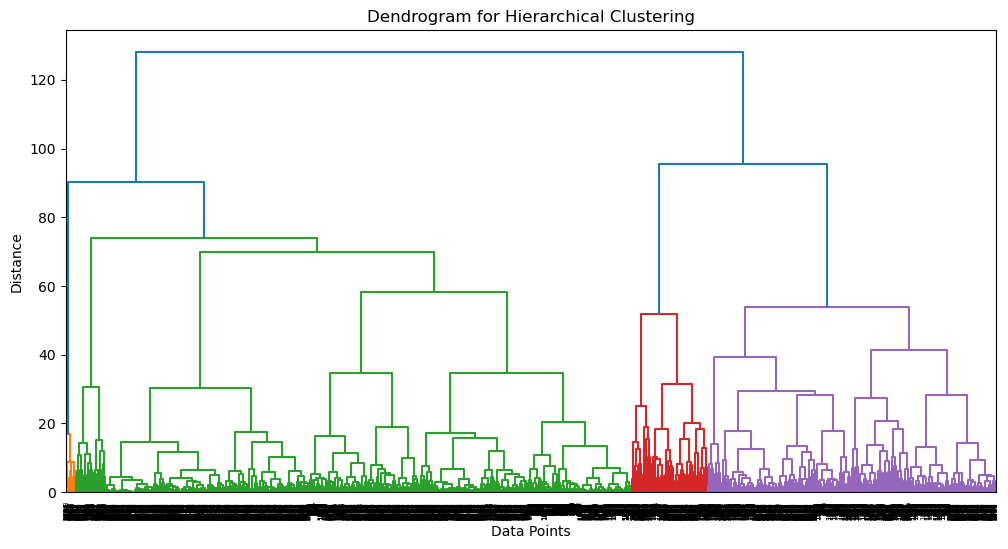

In [ ]:
# Plotting Dendrogram

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

- Dendrogram helps visually decide optimal number of clusters
- Large vertical jumps indicate good cluster separation

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

Clusters: 2, Silhouette Score: 0.2404
Clusters: 3, Silhouette Score: 0.2398
Clusters: 4, Silhouette Score: 0.2578
Clusters: 5, Silhouette Score: 0.2728
Clusters: 6, Silhouette Score: 0.1836


In [ ]:
hierarchical = AgglomerativeClustering(
    n_clusters=5,
    linkage='ward'
)

hierarchical_labels = hierarchical.fit_predict(scaled_data)

In [ ]:
hierarchical_silhouette = silhouette_score(
    scaled_data,
    hierarchical_labels
)

hierarchical_silhouette

0.27284791192628655

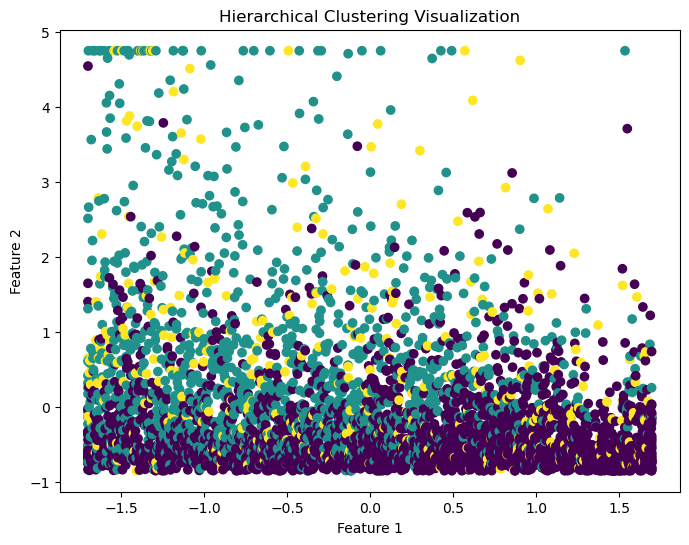

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    scaled_data[:, 0],
    scaled_data[:, 1],
    c=hierarchical_labels,
    cmap='viridis'
)
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Evaluation Metric Summary
labels = hierarchical_labels
silhouette_score(scaled_data, labels)

0.27284791192628655

In [ ]:
comparison_df = pd.DataFrame({
    "Algorithm": ["K-Means", "DBSCAN", "Hierarchical"],
    "Number of Clusters": [3, 9, 3],
    "Silhouette Score": [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette]
})

comparison_df

,Algorithm,Number of Clusters,Silhouette Score
0,K-Means,3,0.204868
1,DBSCAN,9,0.080152
2,Hierarchical,3,0.272848


- Hierarchical clustering provides more stable clusters than DBSCAN
- Silhouette Score may still be low due to:
  1. High dimensionality
  2. Overlapping customer behavior